In [0]:
# Support Vector Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
%matplotlib inline

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [0]:
# Importing the dataset

data = pd.read_csv('Advertising-1.csv')

In [0]:
data.shape

(200, 5)

In [0]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
Radio         200 non-null float64
Newspaper     200 non-null float64
Sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [0]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


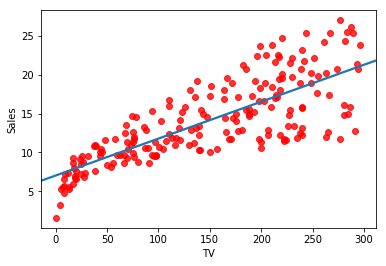

In [0]:
sns.regplot(data.TV, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

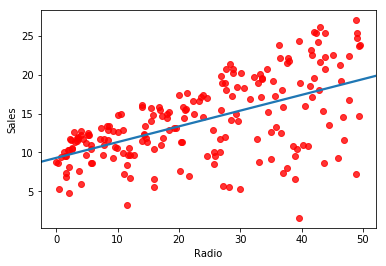

In [0]:
sns.regplot(data.Radio, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

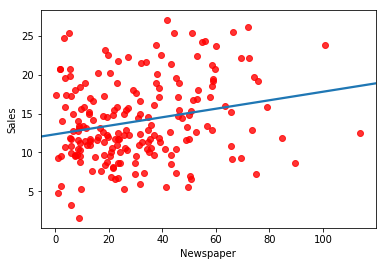

In [0]:
sns.regplot(data.Newspaper, data.Sales, order=1, ci=None, scatter_kws={'color':'r'})

# Multiple Linear Regression

In [0]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

/usr/local/anaconda/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
regr = LinearRegression()

X = data[['TV']]
y = data[['Sales']]

In [0]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
Sales_pred = regr.predict(X)

In [0]:
print("The R2 score for UVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for UVLR is 0.611875


In [0]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [0]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
Sales_pred = regr.predict(X)

In [0]:
print("The R2 score for MVLR is %f" % (r2_score(y, Sales_pred))) 

The R2 score for MVLR is 0.897211


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
Sales_pred = regr.predict(X_test)

In [0]:
print("The R2 score for MVLR is %f" % (r2_score(y_test, Sales_pred))) 

The R2 score for MVLR is 0.875456


# SVR

In [0]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X,y)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
# Predicting a new result with the Support Vector Regression 
y_Pred = regressor.predict(X)

In [0]:
print("The R2 score for SVR is %f" % (r2_score(y, regressor.predict(X)))) 

The R2 score for SVR is 0.891620


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [0]:
# Fitting the SVR model to the dataset
regressor = SVR(kernel = 'linear')
regressor.fit(X_train, y_train)

/usr/local/anaconda/python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_Pred = regressor.predict(X_test)

In [0]:
print("The R2 score for SVR is %f" % (r2_score(y_test, regressor.predict(X_test)))) 

The R2 score for SVR is 0.842564
